In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [5]:
df = pd.read_csv("FUELCONSUMPTION.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS' ,'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


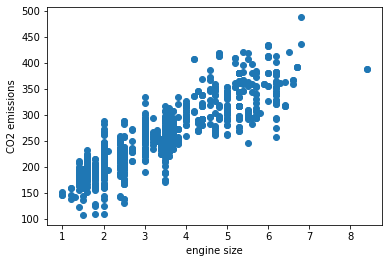

In [7]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'])
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

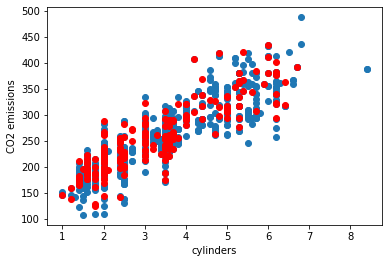

In [15]:
msk = np.random.rand( len(cdf) ) < 0.8
train_set = cdf[msk]
test_set = cdf[~msk]

plt.scatter(train_set['ENGINESIZE'], train_set['CO2EMISSIONS'])
plt.scatter(test_set['ENGINESIZE'], test_set['CO2EMISSIONS'], color = 'red')
plt.xlabel('cylinders')
plt.ylabel('CO2 emissions')
plt.show()


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [39]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly, train_y)
print("coef is: ", regr.coef_)
print("intercept is: ", regr.intercept_)

coef is:  [[ 0.         51.49567082 -1.63615932]]
intercept is:  [104.59516796]


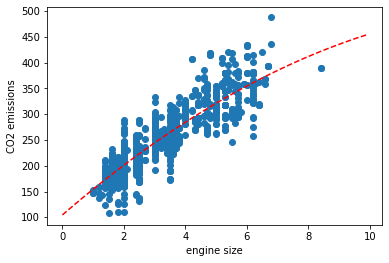

In [51]:
XX = np.arange(0, 10, 0.1)
YY = regr.intercept_[0] + regr.coef_[0][1]*XX + regr.coef_[0][2]*np.power(XX, 2)
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'])
plt.plot(XX, YY, '--r')
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

In [49]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
eval_y = regr.predict(test_x_poly)
R2 = r2_score(test_y, eval_y)
print("the R2 score is: %.2f" % R2)


the R2 score is: 0.75


# practice
#### test for cubic instead

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train_set[['ENGINESIZE']])
train_y = np.asanyarray(train_set[['CO2EMISSIONS']])

test_x = np.asanyarray(test_set[['ENGINESIZE']])
test_y = np.asanyarray(test_set[['CO2EMISSIONS']])

poly3 = PolynomialFeatures(degree = 3)
train_x_poly = poly3.fit_transform(train_x)

In [58]:
regr3 = linear_model.LinearRegression()
regr3.fit(train_x_poly, train_y)

print("coef3 is: ", regr3.coef_)
print("intercept3 is: ", regr3.intercept_)

coef3 is:  [[ 0.         30.8311044   4.00604053 -0.46388015]]
intercept3 is:  [126.73324237]


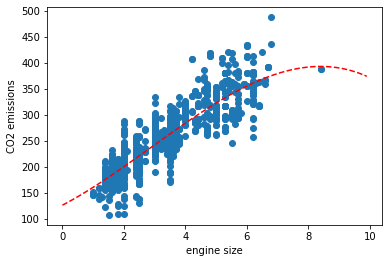

In [60]:
XX3 = np.arange(0, 10, 0.1)
YY3 = regr3.intercept_[0] + regr3.coef_[0][1]*XX3 + regr3.coef_[0][2]*np.power(XX3, 2) + regr3.coef_[0][3]*np.power(XX3, 3)
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'])
plt.plot(XX3, YY3, '--r')
plt.xlabel('engine size')
plt.ylabel('CO2 emissions')
plt.show()

In [63]:
from sklearn.metrics import r2_score
test_x_poly3 = poly3.fit_transform(test_x)
eval_y = regr3.predict(test_x_poly3)
R2 = r2_score(test_y, eval_y)

print("R2 score is: %.2f" % R2)

R2 score is: 0.75
